In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
N = 20
def population(pc_gay, pc_les):
    '''
    matrice avec individu tuple = (genre,orientation,région,contamination)
    '''
    if np.random.randint(2)==0:
        C=pc_les
    else:
        C=pc_gay
    
    state = np.array([(np.random.randint(2),np.random.random()<C) for i in range(20)])
    
    return state

In [18]:
#on entre les pourcentage de gay (7%) et lesbienne (1%)
prc_gay=0.07
state = population(prc_gay,0.01)

In [19]:
#on va rajouter un parametre dans la matrice qui est la provenance des regions
#on fait une liste de tuple avec les regions et les probabilités de venir de là
L = [ ('Haut de France',0.09), ('Grand Est',0.08), ('Normandie',0.05), ('Bretagne', 0.05), ('Pays de la Loire', 0.06), ('Centre Val de Loire',0.04), ('IDF',0.18),('Bourgogne Franche Comté', 0.04), ('Nouvelle Aquitaine', 0.09), ('Auvergne Rhone Alpes',0.12),('Occitanie',0.09), ('Provence Alpes Cotes d Azur',0.07), ('Corse', 0.01), ('Guadeloupe', 0.01), ('Martinique', 0.01), ('Guyane', 0.01), ('Reunion', 0.01), ('Mayotte',0.01) ]

In [20]:
def provenance (L) :
    e=0
    i,j=L[e]
    s=j
    p = np.random.random()

    while  p> s:
        e=e+1
        s = s +L[e][1]
    return L[e][0]

In [21]:
print(provenance(L))

Pays de la Loire


In [22]:
N = 20
def population2(pc_gay, pc_les, L):
    '''
    matrice avec individu tuple = (genre,orientation,région)
    '''
    if np.random.randint(2)==0:
        C=pc_les
    else:
        C=pc_gay
        
    
    state = np.array([(np.random.randint(2),np.random.random()<C, provenance(L)) for i in range(20)])
    
    return state

In [23]:
#On va rajouter un autre parametre afin de savoir si la personne est infectee ou non, parametre a rajouter dans la matrice


def infection (S) : 
    if np.random.random() < S:
        return 'infecté'
    else:
        return 'non infecté'

In [24]:
N = 20
def population3(pc_gay, pc_les, L,S):
    '''
    matrice avec individu tuple = (genre,orientation,région,contamination)
    '''
    if np.random.randint(2)==0:
        C=pc_les
    else:
        C=pc_gay

    
    state = np.array([(np.random.randint(2),np.random.random()<C, provenance(L), infection(S)) for i in range(20)], dtype=object)
    
    return state

In [25]:
newstate = population3(prc_gay,0.01,L,0.5)
print (newstate)

[[0 False 'Normandie' 'non infecté']
 [0 False 'Bretagne' 'non infecté']
 [1 False 'IDF' 'non infecté']
 [1 False 'IDF' 'infecté']
 [1 False 'IDF' 'infecté']
 [0 False 'Nouvelle Aquitaine' 'non infecté']
 [1 False 'Normandie' 'infecté']
 [1 False 'Bourgogne Franche Comté' 'infecté']
 [1 False 'Guyane' 'infecté']
 [1 False 'Occitanie' 'non infecté']
 [1 False 'Haut de France' 'infecté']
 [1 False 'Nouvelle Aquitaine' 'infecté']
 [0 False 'Grand Est' 'infecté']
 [0 False 'Normandie' 'infecté']
 [0 False 'IDF' 'non infecté']
 [0 False 'Pays de la Loire' 'non infecté']
 [0 False 'IDF' 'non infecté']
 [1 False 'Centre Val de Loire' 'non infecté']
 [0 False 'Occitanie' 'infecté']
 [0 False 'Auvergne Rhone Alpes' 'non infecté']]


In [27]:
ligne_a=np.random.randint(N+1)
a=(newstate[ligne_a])


In [28]:
ligne_b=np.random.randint(N+1)
b=(newstate[ligne_b])

In [29]:
def compatibilite(a,b):
    
    #x défini le genre et y defini lorientation sexuelle 
    #Pour le genre, femme (0) et homme (1)
    #Pour lorientation sexuelle, homosexuel (1) et hétéro(0)
    
    x1,y1,c,d = a
    x2,y2,j,k = b
    if y1 == y2 and y1 == 1 :
        if x1 == x2 :
            return 'compatible'
        else : 
            return 'non compatible'
    elif y1==y2 and y1==0:
        if x1==x2:
            return 'non compatible'
        else : 
            return 'compatible'
    elif y1 != y2 :
        return 'non compatible'
    
print(compatibilite(newstate[1],newstate[1]))

non compatible


In [30]:
#probabilité que les deux personnes aient un rapport sexuel après la rencontre
Prs = 0.2

In [31]:
def rapport_sexuel(a,b,Prs,newstate):
    
    
    (ya,zb,c,d) = a
    (e,f,g,h) = b
    
    
    if compatibilite(a,b)== 'compatible' and (_,_,c,_)==(_,_,g,_):
       
        y=np.random.random()
        #print(y)
        if y <= Prs :
            return 'rapport'
    return 'non rapport'

In [32]:
#pourcentage rapport protégé
Prp = 0.8

In [33]:
def protection(a,b,Prs,Prp,newstate):
    
    if rapport_sexuel(a,b,Prs,newstate)== 'rapport':
        z=np.random.random()
        
        if z <= Prp:
            return 'rapport protégé'
        else:
            return 'rapport non protégé'
    return 'pas de rapport'

In [34]:
print(protection(newstate[1],newstate[5],Prs,Prp,newstate))

pas de rapport


In [35]:
#taux de femmes pratiquant le sexe anal
Ts = 0.1

In [36]:
#probabilité de transmettre le sida selon le rapport
import random

RAR = 0.015
RI = 0.0006
RVR = 0.0015

In [37]:
def sida(a,b,Prs,RAR,RI,RVR,newstate):
    
    print(a,b)
    protege = protection(a,b,Prs,Prp,newstate)
    
    (ya,zb,_,d) = a
    (e,f,_,h) = b
    
    if protege == 'rapport non protégé':
        print("non protégé")
        
        
        if (ya,zb,_,d) ==(1,False,_,'infecté') and (e,f,_,h)==(0,False,_,'non infecté'):
            s = random.random()
            print('r')
            if s <= RVR:
                newstate[ligne_d]= np.array([0, False,_, 'infecté'], dtype=object)
                return newstate                         #'femme infectée'
        elif (ya,zb,_,d)==(1,False,_,'non infecté') and (e,f,_,h)==(0,False,_,'infecté'):
            s1 = random.random()
            print('r')
            print(s1)
            if s1 <= RI:
                newstate[ligne_c]= np.array([1, False,_, 'infecté'], dtype=object)
                return newstate
            print(newstate[ligne_a])                                    #'homme infecté'
                
        elif (ya,zb,_,d) ==(0,False,_,'infecté') and (e,f,_,h)==(1,False,_,'non infecté'):
            s2 = random.random()
            print(newstate[5])
            if s2 <= RI:
                newstate[ligne_d]= np.array([1, False,_, 'infecté'], dtype=object)
                return newstate                                #'homme infecté'
                
        elif (ya,zb,_,d) ==(0,False,_,'non infecté') and (e,f,_,h)==(1,False,_,'infecté'):
            s3 = random.random()
            print('r')
            if s3 <= RVR:
                newstate[ligne_c]= np.array([0, False,_, 'infecté'], dtype=object)
                return newstate                                   #'femme infectée'
        elif (ya,zb,_,d) ==(1,True,_,'infecté') and (e,f,_,h)==(1,True,_,'non infecté'):
            s4 = random.random()
            print('r')
            if s4 <= 0.5:
                if s4<=RI:
                    newstate[ligne_d]= np.array([1, True,_, 'infecté'], dtype=object)
                    return newstate    
            elif s4>0.5:
                if s4>RAR:
                    newstate[ligne_d]= np.array([1, True,_, 'infecté'], dtype=object)
                    return newstate
        elif (ya,zb,_,d) ==(1,True,_,'non infecté') and (e,f,_,h)==(1,True,_,'infecté'):
            s5 = random.random()
            print('r')
            if s5 <= 0.5:
                if s5<=RI:
                    newstate[ligne_c]= np.array([1, True,_, 'infecté'], dtype=object)
                    return newstate    
            elif s5>0.5:
                if s5>RAR:
                    newstate[ligne_c]= np.array([1, True,_, 'infecté'], dtype=object)
                    return newstate   
                    
                    
    return
print(ligne_b)

11


In [38]:
s = np.random.random()
print(np.any(s<=RVR))

False


In [39]:
print(a,b)
print(protection(a,b,Prs,Prp,newstate))

[1 False 'Bourgogne Franche Comté' 'infecté'] [1 False 'Nouvelle Aquitaine' 'infecté']
pas de rapport


In [40]:
print(sida(a,b,Prs,RAR,RI,RVR,newstate))

[1 False 'Bourgogne Franche Comté' 'infecté'] [1 False 'Nouvelle Aquitaine' 'infecté']
None


In [41]:
sida(a,b,Prs,RAR,RI,RVR,newstate)
type(a)

[1 False 'Bourgogne Franche Comté' 'infecté'] [1 False 'Nouvelle Aquitaine' 'infecté']


numpy.ndarray

In [42]:
sida(a,b,Prs,RAR,RI,RVR,newstate)
print(sida(a,b,Prs,RAR,RI,RVR,newstate))

[1 False 'Bourgogne Franche Comté' 'infecté'] [1 False 'Nouvelle Aquitaine' 'infecté']
[1 False 'Bourgogne Franche Comté' 'infecté'] [1 False 'Nouvelle Aquitaine' 'infecté']
None


In [43]:
def simulation(nb,newstate,Prs):
    i = 0

    while i<= nb :
        ligne_c=np.random.randint(N)
        a=(newstate[ligne_c])
        ligne_d=np.random.randint(N)
        b=(newstate[ligne_d])
        print(a,b)
        protege = protection(a,b,Prs,Prp,newstate)
    
        (ya,zb,_,d) = a
        (e,f,_,h) = b
    
        if protege == 'rapport non protégé':
            print("non protégé")
        
        
            if (ya,zb,_,d) ==(1,False,_,'infecté') and (e,f,_,h)==(0,False,_,'non infecté'):
                s = random.random()
                print('r')
                if s <= RVR:
                    newstate[ligne_d]= np.array([0, False,_, 'infecté'], dtype=object)
                    return newstate                         #'femme infectée'
            elif (ya,zb,_,d)==(1,False,_,'non infecté') and (e,f,_,h)==(0,False,_,'infecté'):
                s1 = random.random()
                print('r')
                print(s1)
                if s1 <= RI:
                    newstate[ligne_c]= np.array([1, False,_, 'infecté'], dtype=object)
                    return newstate
                print(newstate[ligne_a])                                    #'homme infecté'
                
            elif (ya,zb,_,d) ==(0,False,_,'infecté') and (e,f,_,h)==(1,False,_,'non infecté'):
                s2 = random.random()
                print(newstate[5])
                if s2 <= RI:
                    newstate[ligne_d]= np.array([1, False,_, 'infecté'], dtype=object)
                    return newstate                                #'homme infecté'
                
            elif (ya,zb,_,d) ==(0,False,_,'non infecté') and (e,f,_,h)==(1,False,_,'infecté'):
                s3 = random.random()
                print('r')
                if s3 <= RVR:
                    newstate[ligne_c]= np.array([0, False,_, 'infecté'], dtype=object)
                    return newstate                                   #'femme infectée'
            elif (ya,zb,_,d) ==(1,True,_,'infecté') and (e,f,_,h)==(1,True,_,'non infecté'):
                s4 = random.random()
                print('r')
                if s4 <= 0.5:
                    if s4<=RI:
                        newstate[ligne_d]= np.array([1, True,_, 'infecté'], dtype=object)
                        return newstate    
                elif s4>0.5:
                    if s4>RAR:
                        newstate[ligne_d]= np.array([1, True,_, 'infecté'], dtype=object)
                        return newstate
            elif (ya,zb,_,d) ==(1,True,_,'non infecté') and (e,f,_,h)==(1,True,_,'infecté'):
                s5 = random.random()
                print('r')
                if s5 <= 0.5:
                    if s5<=RI:
                        newstate[ligne_c]= np.array([1, True,_, 'infecté'], dtype=object)
                        return newstate    
                elif s5>0.5:
                    if s5>RAR:
                        newstate[ligne_c]= np.array([1, True,_, 'infecté'], dtype=object)
                        return newstate   
                    
                    
        

        i+=1
    return newstate

In [44]:
print(simulation(50,newstate,0))


[1 False 'Normandie' 'infecté'] [0 False 'Pays de la Loire' 'non infecté']
[1 False 'Nouvelle Aquitaine' 'infecté'] [0 False 'Grand Est' 'infecté']
[1 False 'Haut de France' 'infecté'] [0 False 'Grand Est' 'infecté']
[1 False 'Haut de France' 'infecté'] [0 False 'Normandie' 'infecté']
[0 False 'Pays de la Loire' 'non infecté'] [1 False 'Normandie' 'infecté']
[0 False 'IDF' 'non infecté'] [0 False 'Auvergne Rhone Alpes' 'non infecté']
[0 False 'Auvergne Rhone Alpes' 'non infecté'] [0 False 'Bretagne' 'non infecté']
[0 False 'Auvergne Rhone Alpes' 'non infecté'] [0 False 'Occitanie' 'infecté']
[1 False 'Normandie' 'infecté'] [1 False 'Occitanie' 'non infecté']
[0 False 'Occitanie' 'infecté'] [1 False 'Centre Val de Loire' 'non infecté']
[1 False 'IDF' 'infecté'] [1 False 'IDF' 'infecté']
[1 False 'IDF' 'non infecté'] [1 False 'Nouvelle Aquitaine' 'infecté']
[0 False 'Auvergne Rhone Alpes' 'non infecté'] [1 False 'Occitanie' 'non infecté']
[0 False 'Bretagne' 'non infecté'] [0 False 'Norm

In [45]:
def nb_infecte(prc_gay,L,newstate,Prs):
    newstate2 = simulation(30,population3(prc_gay,0.01,L,0.5),Prs)
    x=newstate2[0]
    print(x)
    (_,_,_,d)=x
    N=20
    compteur=0
    for i in range(0,N):
        (_,_,_,d)=newstate2[i]
        if  (_,_,_,d)==(_,_,_, 'infecté'):
            compteur=compteur+1
            
    return compteur
        
print(nb_infecte(prc_gay,L,newstate,Prs))   

[1 False 'Occitanie' 'infecté'] [0 False 'Bourgogne Franche Comté' 'infecté']
[1 False 'Haut de France' 'infecté'] [1 False 'IDF' 'infecté']
[0 False 'Auvergne Rhone Alpes' 'infecté'] [0 False 'Auvergne Rhone Alpes' 'infecté']
[0 False 'Normandie' 'non infecté'] [1 False 'Haut de France' 'infecté']
[0 False 'Occitanie' 'infecté'] [0 False 'Auvergne Rhone Alpes' 'infecté']
[0 False 'Auvergne Rhone Alpes' 'infecté'] [0 False 'Centre Val de Loire' 'infecté']
[0 False 'Nouvelle Aquitaine' 'infecté'] [1 False 'Haut de France' 'infecté']
[1 False 'Normandie' 'infecté'] [1 False 'Pays de la Loire' 'non infecté']
[1 False 'Pays de la Loire' 'infecté'] [0 False 'Occitanie' 'infecté']
[1 False 'Normandie' 'infecté'] [1 False 'Normandie' 'infecté']
[0 False 'Centre Val de Loire' 'infecté'] [0 False 'Nouvelle Aquitaine' 'infecté']
[1 False 'Haut de France' 'infecté'] [0 False 'Occitanie' 'infecté']
[1 False 'IDF' 'infecté'] [0 False 'Bourgogne Franche Comté' 'infecté']
[0 False 'Bourgogne Franche 

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[1 False 'IDF' 'infecté'] [0 False 'Haut de France' 'infecté']
[1 False 'Bourgogne Franche Comté' 'non infecté'] [1 False 'Bretagne' 'non infecté']
[1 False 'Bretagne' 'non infecté'] [0 False 'IDF' 'infecté']
[0 False 'Pays de la Loire' 'non infecté'] [1 False 'Haut de France' 'infecté']
[1 False 'Haut de France' 'infecté'] [0 False 'Pays de la Loire' 'non infecté']
[1 False 'Bretagne' 'non infecté'] [1 False 'IDF' 'infecté']
[1 False 'IDF' 'infecté'] [1 False 'Bretagne' 'non infecté']
[0 False 'IDF' 'non infecté'] [1 False 'Provence Alpes Cotes d Azur' 'infecté']
[1 False 'Bretagne' 'non infecté'] [0 False 'Haut de France' 'infecté']
[1 False 'Haut de France' 'infecté'] [0 False 'Pays de la Loire' 'non infecté']
[1 False 'Bourgogne Franche Comté' 'non infecté'] [1 False 'Haut de France' 'infecté']
[1 False 'Haut de France' 'infecté'] [1 False 'Bretagne' 'non infecté']
[1 False 'Bourgogne Franche Comté' 'non infecté'] [0 False 'Pays de la L

[1 False 'Bretagne' 'non infecté'] [1 False 'Pays de la Loire' 'non infecté']
[1 False 'Bourgogne Franche Comté' 'non infecté'] [1 False 'Occitanie' 'non infecté']
[1 False 'Occitanie' 'non infecté'] [1 False 'IDF' 'infecté']
[1 False 'Bretagne' 'non infecté'] [0 False 'Auvergne Rhone Alpes' 'non infecté']
[1 False 'Pays de la Loire' 'non infecté'] [1 False 'IDF' 'non infecté']
[0 False 'Haut de France' 'infecté'] [0 False 'Auvergne Rhone Alpes' 'non infecté']
[1 False 'Haut de France' 'infecté'] [0 False 'Occitanie' 'infecté']
[0 False 'Haut de France' 'infecté'] [0 False 'Provence Alpes Cotes d Azur' 'non infecté']
[1 False 'Provence Alpes Cotes d Azur' 'non infecté'] [0 False 'Occitanie' 'infecté']
[0 False 'Haut de France' 'non infecté'] [1 False 'Pays de la Loire' 'non infecté']
[1 False 'Auvergne Rhone Alpes' 'infecté'] [0 False 'Occitanie' 'infecté']
[0 False 'Occitanie' 'infecté'] [1 False 'Haut de France' 'infecté']
[1 False 'Auvergne Rhone Alpes' 'infecté'] [0 False 'Occitani

[1 False 'Auvergne Rhone Alpes' 'infecté'] [0 False 'Bretagne' 'non infecté']
[1 False 'Haut de France' 'non infecté'] [1 False 'Haut de France' 'infecté']
[0 False 'Nouvelle Aquitaine' 'infecté'] [0 False 'Bretagne' 'non infecté']
[1 False 'Auvergne Rhone Alpes' 'infecté'] [0 False 'Pays de la Loire' 'infecté']
[1 False 'IDF' 'infecté'] [0 False 'Pays de la Loire' 'infecté']
[1 False 'Pays de la Loire' 'infecté'] [0 False 'Nouvelle Aquitaine' 'infecté']
[1 False 'Haut de France' 'infecté'] [0 False 'Bretagne' 'non infecté']
[0 False 'Pays de la Loire' 'infecté'] [0 False 'Provence Alpes Cotes d Azur' 'non infecté']
[1 False 'Corse' 'infecté'] [1 False 'Corse' 'infecté']
[1 False 'Auvergne Rhone Alpes' 'infecté'] [1 False 'Pays de la Loire' 'infecté']
[1 False 'Auvergne Rhone Alpes' 'infecté'] [1 False 'Pays de la Loire' 'infecté']
[1 False 'Corse' 'infecté'] [1 False 'Pays de la Loire' 'infecté']
[1 False 'Pays de la Loire' 'infecté'] [1 False 'Provence Alpes Cotes d Azur' 'infecté']


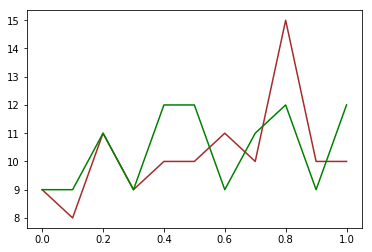

In [46]:
from pylab import *
%matplotlib inline
import random


gay = np.linspace(0,1,11)
print(gay)

results = []


for prc_gay in gay:
    results.append(np.mean(nb_infecte(prc_gay,L,newstate,0.2)))
    
rapport = np.linspace(0,1,11)
print(rapport)

results1 = []

for Prs in rapport:
    results1.append(np.mean(nb_infecte(0.07,L,newstate,Prs)))

plot(rapport, results1, color="brown")
plot(gay, results, color="green")



show()